In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


# Logistic Regression

In [85]:
churnData = pd.read_csv('Data/churn.csv')

In [86]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Clean Data

In [87]:
churnData.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [88]:
def churn_to_binom(x):
    """Change churn column from yes and no to binomial values"""

    if x == "No":
        return 0
    elif x == "Yes":
        return 1

In [89]:
churnData.Churn = churnData.Churn.apply(churn_to_binom)

In [90]:
churnData.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [91]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [92]:
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors='coerce')

In [93]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [94]:
def replace_nulls(x):
    """ Replace null values with the mean of the column"""
    
    mean = np.mean(x)
    x = x.fillna(mean, inplace=True)

In [95]:
replace_nulls(churnData.TotalCharges)

In [96]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### X-y Split

In [97]:
X = churnData._get_numeric_data().drop(columns='Churn')

In [98]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [99]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [100]:
y = churnData.Churn

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [102]:
log = LogisticRegression() 
trans = PowerTransformer()
trans.fit(X_train)

PowerTransformer()

In [103]:
X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)
log.fit(X_train_mod, y_train)

LogisticRegression()

In [104]:
y_pred_train_log = log.predict(X_train_mod)
y_pred_test_log = log.predict(X_test_mod)

In [105]:
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})
display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787362,0.797729
1,Precision,0.650810,0.678862
2,Recall,0.429813,0.447721


Confusion matrix for the train set
[[3793  345]
 [ 853  643]]


/Users/EMMA/opt/anaconda3/envs/DA_Envi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


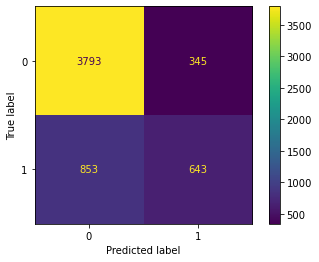



Confusion matrix for the test set
[[957  79]
 [206 167]]


/Users/EMMA/opt/anaconda3/envs/DA_Envi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


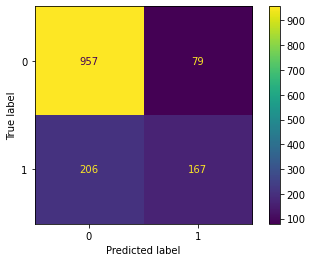

In [106]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log,X_test_mod,y_test, values_format = 'd')
plt.show()

## Decision Tree

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


Confusion matrix for the train set
[[3818  905]
 [ 320  591]]


/Users/EMMA/opt/anaconda3/envs/DA_Envi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


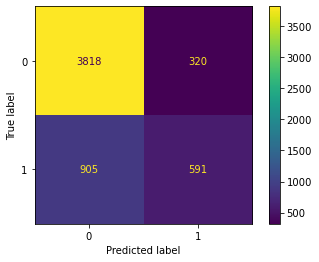



Confusion matrix for the test set
[[954 211]
 [ 82 162]]


/Users/EMMA/opt/anaconda3/envs/DA_Envi/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


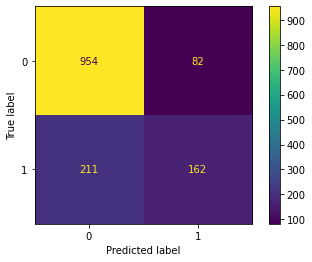

In [107]:
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

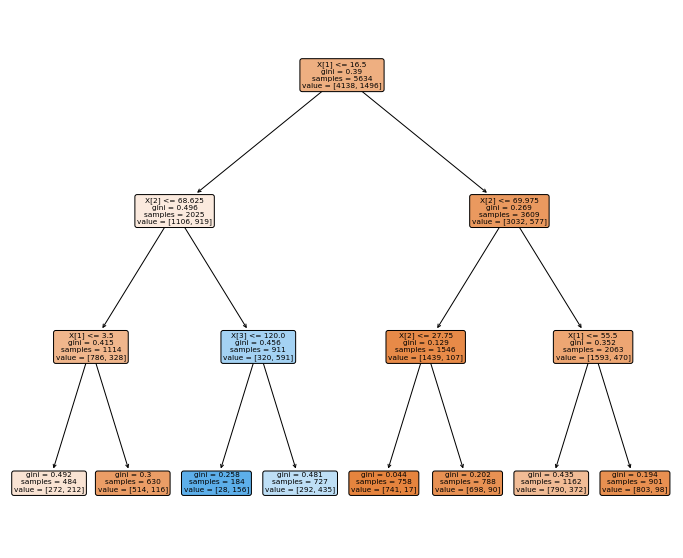

In [108]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,10))

plot_tree(dt,filled = True, rounded=True)
plt.show() 

In [109]:
dt.score(X_test, y_test)

0.7920511000709723

## K-fold cross validation

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [111]:
scores = cross_val_score(dt, X_train, y_train, cv=5)
scores

array([0.78615794, 0.78793256, 0.76397516, 0.78083407, 0.77886323])

In [112]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


0.78 accuracy with a standard deviation of 0.01


In [113]:
y_pred = cross_val_predict(dt, X_test, y_test, cv=5)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['Regression Tree', 'Linear Regression', 'KNN']
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)


{'Regression Tree': 0.7145868762833352, 'Linear Regression': 0.7868258947129738, 'KNN': 0.762502991824446}


<b> Check for imbalance in y

In [51]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [57]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

Use resampling methods to create a balance between the two classes

<b> Upsampling using SMOTE

In [119]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [121]:
X_sm, y_sm = smote.fit_resample(X, y)


In [122]:
y_sm.value_counts()


0    5174
1    5174
Name: Churn, dtype: int64

In [123]:
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)


{'Regression Tree': 0.7446894476681711, 'Linear Regression': 0.7303857258991394, 'KNN': 0.7691371625599193}


<b> Downsampling using TomekLinks

In [125]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

/Users/EMMA/opt/anaconda3/envs/DA_Envi/lib/python3.9/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


0    4621
1    1869
Name: Churn, dtype: int64

In [128]:
scores = {}
i=0

for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_tl, y_tl, cv=10))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Regression Tree': 0.7459167950693375, 'Linear Regression': 0.7921417565485362, 'KNN': 0.7779661016949153}
